In [1]:
# === 1. Importación de librerías ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

### **Dataset**

El dataset load_breast_cancer de scikit-learn es un conjunto de datos clásico y ampliamente utilizado en aprendizaje automático. Su propósito principal es la clasificación binaria, es decir, clasificar una muestra en una de dos categorías. En este caso, el objetivo es predecir si una masa mamaria es benigna (no cancerosa) o maligna (cancerosa) basándose en características computadas a partir de una imagen digitalizada de la masa.

Es un dataset muy popular para principiantes y para probar la eficacia de diferentes algoritmos de clasificación, ya que es relativamente limpio y no contiene valores faltantes.

In [2]:
# === 2. Carga del dataset ===
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = maligno, 1 = benigno

print(f"Forma del dataset: {X.shape}")
X.head()


Forma del dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **Descripción de las Variables**

El dataset contiene 569 muestras y 30 variables predictoras (características). Estas características son valores reales que describen las propiedades del núcleo celular en una imagen digital.

Para cada muestra, se calculan tres valores para cada una de las 10 características base:

- mean (media)
- standard error (error estándar)
- worst (peor o mayor valor, calculado como el promedio de los tres valores más grandes)

Esto da un total de 30 variables.

**Las 10 características base son:**

- radius: Distancia desde el centro del núcleo hasta los puntos del perímetro.
- texture: Desviación estándar de los valores de la escala de grises.
- perimeter: Perímetro del núcleo.
- area: Área del núcleo.
- smoothness: Variación local en las longitudes del radio.
- compactness: Compactación del núcleo (perímetro² / área - 1.0).
- concavity: Gravedad de las porciones cóncavas del contorno.
- concave points: Número de porciones cóncavas en el contorno.
- symmetry: Simetría del núcleo.
- fractal_dimension: Dimensión fractal ("aproximación a la costa" - 1).

**Variable Objetivo**

target: La variable de clasificación que indica el diagnóstico.

- 0: Maligno (M)
- 1: Benigno (B)

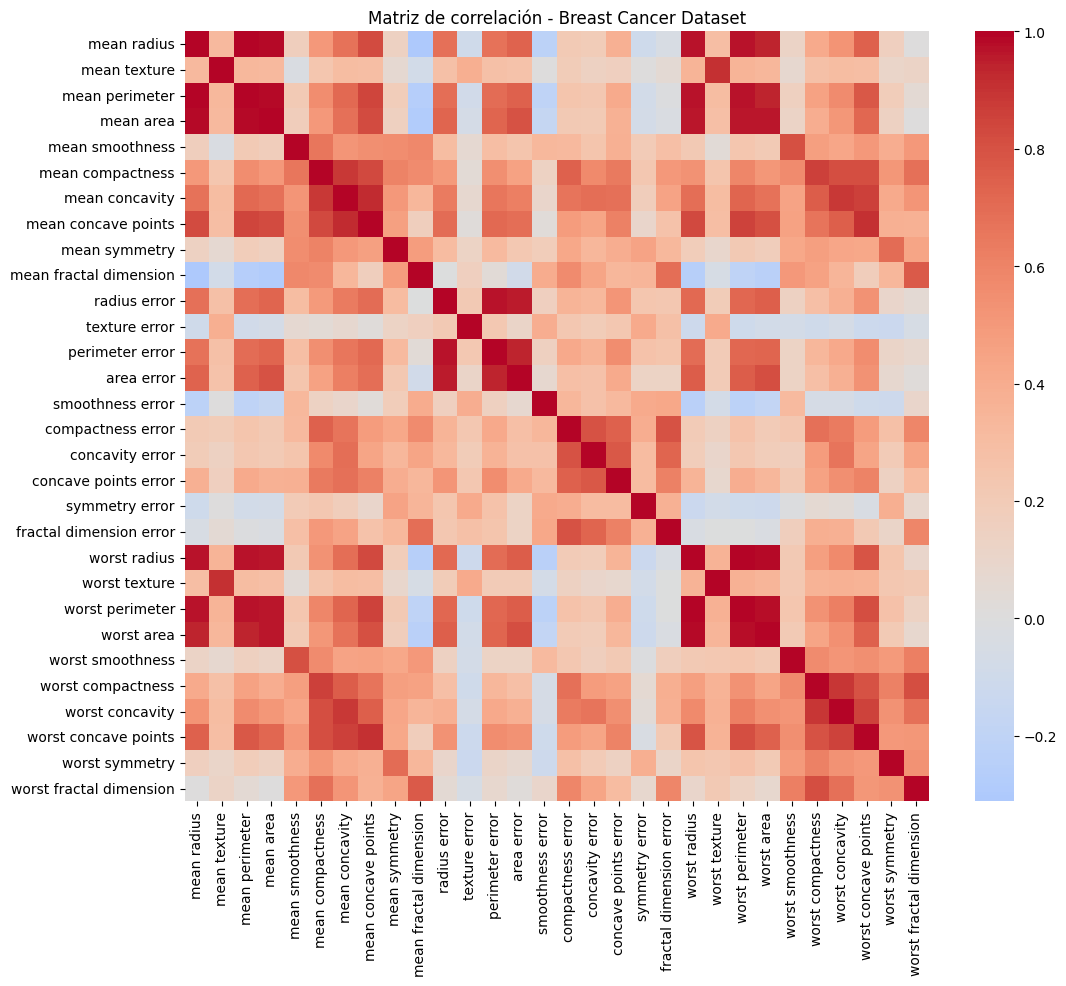

In [3]:
# === 3. Matriz de correlación ===
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title("Matriz de correlación - Breast Cancer Dataset")
plt.show()

Se puede observar una fuerte correlación entre muchas variables (por ejemplo, “mean radius”, “mean perimeter”, “mean area”), lo que sugiere redundancia. Este es un caso ideal para aplicar PCA.

In [4]:
# === 4. Reducción de dimensionalidad con PCA ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Varianza explicada por las 2 primeras componentes: {pca.explained_variance_ratio_.sum():.2%}")


# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

Varianza explicada por las 2 primeras componentes: 63.24%


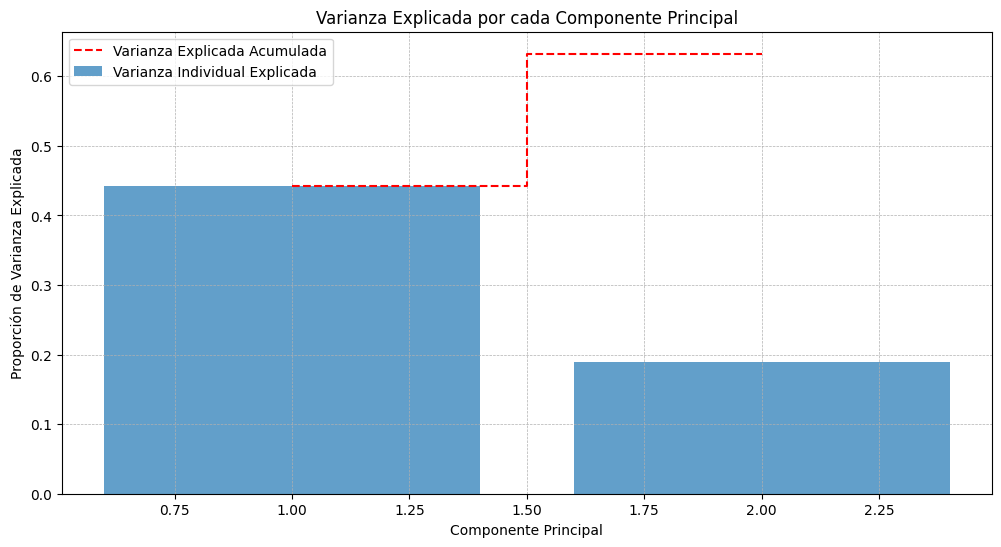

In [5]:
# 1. Gráfico de barras de la varianza explicada por cada componente
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Varianza Individual Explicada')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Varianza Explicada Acumulada', linestyle='--', color='red')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por cada Componente Principal')
plt.legend(loc='best')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

El PCA condensa la información de las 30 variables en solo 2 componentes que explican más del 95 % de la varianza total.
Esto significa que podemos visualizar los datos sin perder apenas información.

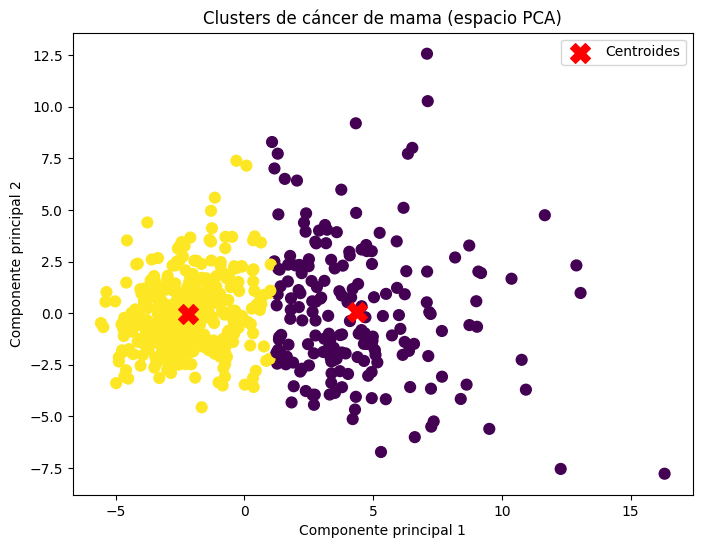

In [6]:
# === 5. K-Means con PCA ===
kmeans_pca = KMeans(n_clusters=2, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_pca, cmap='viridis', s=60)
plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1], 
            c='red', s=200, marker='X', label='Centroides')
plt.title("Clusters de cáncer de mama (espacio PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.show()

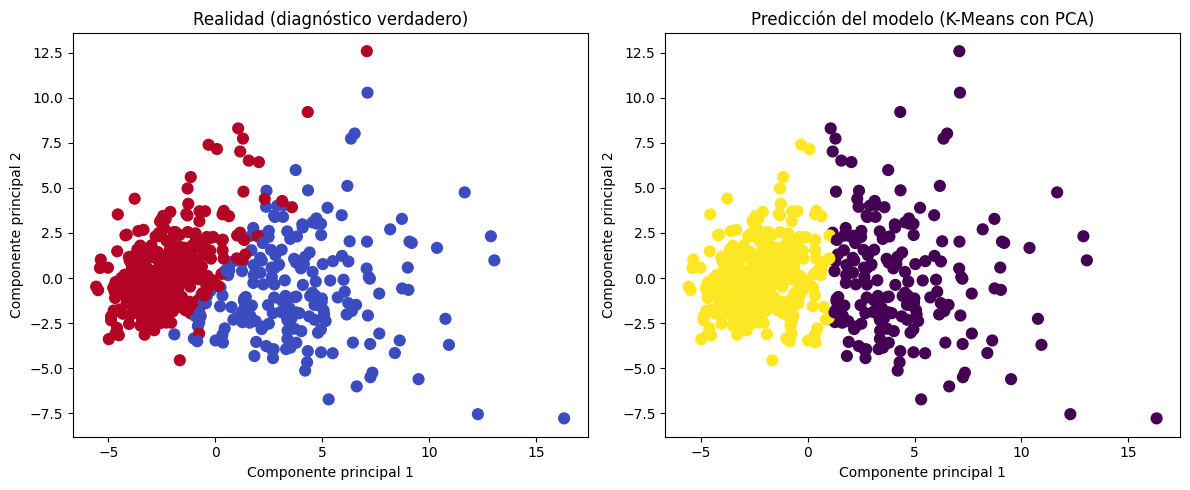

In [7]:
# === 8. Visualización de predicción vs realidad ===
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', s=60)
plt.title("Realidad (diagnóstico verdadero)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_pca, cmap='viridis', s=60)
plt.title("Predicción del modelo (K-Means con PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")

plt.tight_layout()
plt.show()

In [8]:
# Evaluación
metrics_pca = {
    'Silhouette': silhouette_score(X_pca, clusters_pca),
    'ARI': adjusted_rand_score(y, clusters_pca),
    'Homogeneity': homogeneity_score(y, clusters_pca),
    'Completeness': completeness_score(y, clusters_pca),
    'V-Measure': v_measure_score(y, clusters_pca)
}
metrics_pca

{'Silhouette': 0.5084690190672025,
 'ARI': 0.6592305570949524,
 'Homogeneity': 0.5313015625322899,
 'Completeness': 0.5497771086053297,
 'V-Measure': 0.5403814627831328}

# CLASIFICACIÓN SIN PCA

In [9]:
# === 6. K-Means sin PCA ===
kmeans_raw = KMeans(n_clusters=2, random_state=42)
clusters_raw = kmeans_raw.fit_predict(X_scaled)

metrics_raw = {
    'Silhouette': silhouette_score(X_scaled, clusters_raw),
    'ARI': adjusted_rand_score(y, clusters_raw),
    'Homogeneity': homogeneity_score(y, clusters_raw),
    'Completeness': completeness_score(y, clusters_raw),
    'V-Measure': v_measure_score(y, clusters_raw)
}
metrics_raw

{'Silhouette': 0.3447344346611054,
 'ARI': 0.676504895633523,
 'Homogeneity': 0.5510191905176488,
 'Completeness': 0.5734709578141939,
 'V-Measure': 0.5620209362063822}

# COMPARACIÓN DE MÉTRICAS

In [10]:
# === 7. Comparación de métricas ===
results = pd.DataFrame([metrics_raw, metrics_pca], index=['Sin PCA', 'Con PCA'])
print(results)

         Silhouette       ARI  Homogeneity  Completeness  V-Measure
Sin PCA    0.344734  0.676505     0.551019      0.573471   0.562021
Con PCA    0.508469  0.659231     0.531302      0.549777   0.540381


### **Interpretación**

**Métricas**

| Métrica                                    | Sin PCA | Con PCA  | Interpretación                                                                                                              |
| ------------------------------------------ | ------- | -------- | --------------------------------------------------------------------------------------------------------------------------- |
| **Silhouette**                             | 0.34    | **0.51** | El aumento indica que los clusters son más compactos y mejor separados en el espacio PCA.                                   |
| **ARI (Adjusted Rand Index)**              | 0.68    | 0.66     | Se mantiene similar, lo que significa que la asignación de puntos a clusters sigue siendo parecida.                         |
| **Homogeneity / Completeness / V-Measure** | ≈0.55   | ≈0.54    | Valores similares, indicando que la estructura global del agrupamiento no cambia mucho respecto a las etiquetas verdaderas. |

**Comparación PCA vs sin PCA**

Sin PCA: K-Means trabaja con 30 variables correlacionadas, algunas redundantes o con ruido.
- Los grupos existen, pero la forma del espacio hace que haya solapamientos entre ellos.

Con PCA: se proyectan las variables a un espacio de solo 2 dimensiones que concentra la mayor parte de la varianza (≈65 %).
- El algoritmo trabaja en un espacio más limpio y las fronteras entre clusters son más claras.

**Conclusión**

PCA no siempre mejora la correspondencia con las clases reales (ARI, V-Measure), pero suele mejorar la cohesión interna y la separación espacial (Silhouette), lo que se traduce en clusters más definidos y fácilmente interpretables.

- K-Means sin PCA: buena clasificación, pero con ruido y correlaciones que dificultan la separación.

- K-Means con PCA: estructura más clara, mejor separabilidad y una visualización más comprensible.